# 다항 회귀

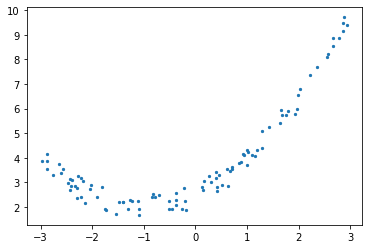

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
n = 100

x = 6 * np.random.rand(n, 1) - 3
y = 0.5 * x**2 + x + 2 + np.random.rand(n, 1)

plt.scatter(x, y, s=5)
plt.show()

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# 데이터 변환 과정과 머신러닝을 연결해주는 파이프라인
from sklearn.pipeline import make_pipeline  

poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly_features.fit_transform(x)
x.shape, x_poly.shape

((100, 1), (100, 2))

In [3]:
x[0], x_poly[0]

(array([0.29288102]), array([0.29288102, 0.08577929]))

In [4]:
# model.coef_, model.intercept_
model = LinearRegression()
model.fit(x_poly, y)
model.coef_, model.intercept_

(array([[0.98599899, 0.48349572]]), array([2.57562084]))

In [5]:
# make_pipeline
model_lr = make_pipeline(poly_features, LinearRegression()).fit(x, y)

print(model_lr.steps[1][1].coef_)

[[0.98599899 0.48349572]]


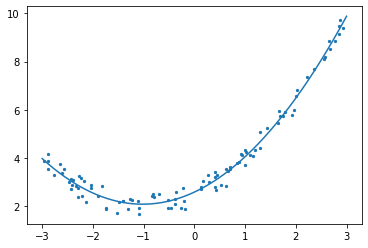

In [6]:
# 다항회귀 그래프
plt.scatter(x, y, s=5)
# x_poly.shape
# y.shape
# x.shape
xx = np.linspace(-3, 3, 1000)

# y_pred = model_lr.predict(xx[:, np.newaxis])
y_pred = model_lr.predict(xx[:, None])
plt.plot(xx, y_pred)   
plt.show()

#### PolynomialFeatures()

```

PolynomialFeatures(degree=2, *, interaction_only=False, include_bias=True)

```

- degree : 차수

- interaction_only: True면 2차항에서 상호작용항만 출력

- include_bias : 상수항 생성 여부


다항 변환

- 입력값  x 를 다항식으로 변환한다.


$$
 x \;\; \rightarrow \;\; [ 1, x, x^2, x^3, \cdots ] 
$$

<br>

- 만약 열의 갯수가 두 개이고 2차 다항식으로 변환하는 경우에는 다음처럼 변환한다.

$$
[x_1, x_2] \;\; \rightarrow \;\; [ 1, x_1, x_2, x_1^2, x_2^2, x_1x_2 ]
$$
 

# Linear / Ridge / Lasso / ElasticNet Regression 비교

|구분| 릿지회귀| 라쏘회귀| 엘라스틱넷|
|---|---|---|---|
|제약식| L2 norm| L1 norm| L1+L2 norm|
|변수선택 |불가능| 가능| 가능|
|solution| closed form| 명시해 없음| 명시해 없음|
|장점| 변수간 상관관계가 높아도 좋은 성능| 변수간 상관관계가 높으면 성능↓| 변수간 상관관계를 반영한 정규화|
|특징| 크기가 큰 변수를 우선 적으로 줄임|비중요 변수를 우선적 으로 줄임|상관관계가 큰 변수를 동시에 선택/배제|

In [7]:
# 데이터 생성
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

def make_nonlinear(seed=0):
    np.random.seed(seed)
    n_samples = 30
    X = np.sort(np.random.rand(n_samples))
    Y = np.sin(2 * np.pi * X) + np.random.randn(n_samples) * 0.1
    X = X[:, np.newaxis]
    return (X, Y)

X, y = make_nonlinear()
dfX = pd.DataFrame(X, columns=["x"])
dfY = pd.DataFrame(y, columns=["y"])
df = pd.concat([dfX, dfY], axis=1)

In [8]:
df.head()

,x,y
0,0.020218,0.213138
1,0.071036,0.357444
2,0.087129,0.747487
3,0.118274,0.531167
4,0.143353,0.788347


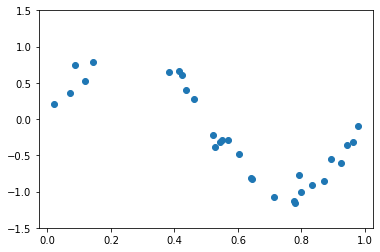

In [9]:
plt.scatter(X, y)
plt.ylim(-1.5, 1.5)
plt.show()

In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

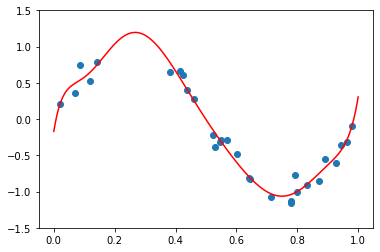

In [11]:
# Linear Regression
poly = PolynomialFeatures(9)
model_lr = make_pipeline(poly, LinearRegression())
model_lr.fit(X, y)

xx = np.linspace(0, 1, 1000)
y_pred = model_lr.predict(xx[:, None])

plt.scatter(X, y)
plt.plot(xx, y_pred, 'r')
plt.ylim(-1.5, 1.5)
plt.show()

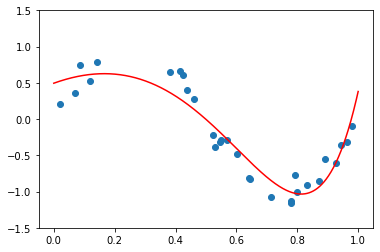

In [12]:
# Ridge Regression
poly = PolynomialFeatures(9)
model_ridge = make_pipeline(poly, Ridge(alpha=0.01))
model_ridge.fit(X, y)

xx = np.linspace(0, 1, 1000)
y_pred = model_ridge.predict(xx[:, None])

plt.scatter(X, y)
plt.plot(xx, y_pred, 'r')
plt.ylim(-1.5, 1.5)
plt.show()

- alpha 값을 조절해가면서 확인

- alpha 가 높아지면 규제가 심해지고 ==> 직선에 가까워진다.

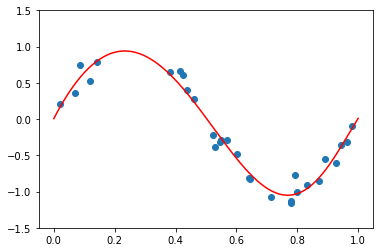

In [13]:
# Lasso Regression
poly = PolynomialFeatures(9)
model_lasso = make_pipeline(poly, Lasso(alpha=0.0001, max_iter=100000))
model_lasso.fit(X, y)

xx = np.linspace(0, 1, 1000)
y_pred = model_lasso.predict(xx[:, None])

plt.scatter(X, y)
plt.plot(xx, y_pred, 'r')
plt.ylim(-1.5, 1.5)
plt.show()

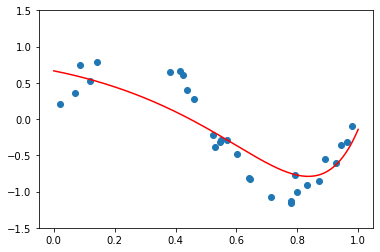

In [14]:
# ElasticNet Regression
poly = PolynomialFeatures(9)
model_elnet = make_pipeline(poly, ElasticNet(alpha=0.01, l1_ratio=0.5, max_iter=1000))
model_elnet.fit(X, y)

xx = np.linspace(0, 1, 1000)
y_pred = model_elnet.predict(xx[:, None])

plt.scatter(X, y)
plt.plot(xx, y_pred, 'r')
plt.ylim(-1.5, 1.5)
plt.show()

## Linear Regression 실습 06

iris dataset

In [15]:
from sklearn.datasets import load_iris

In [16]:
iris = load_iris()

iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### 꽃받침 길이와 꽃잎 길이를 이용한 선형회귀

In [17]:
X_all = iris.data

X = X_all[:, 0]
y = X_all[:, 2]

print(X[:3], y[:3])

[5.1 4.9 4.7] [1.4 1.4 1.3]


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1, 1), y, random_state=42)

In [19]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 1), (38, 1), (112,), (38,))

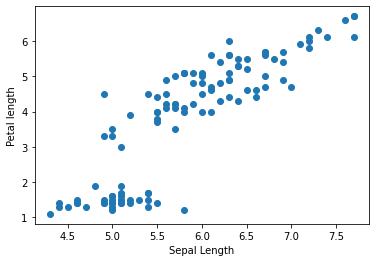

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X_train, y_train)
plt.xlabel("Sepal Length")
plt.ylabel("Petal length")
plt.show()

In [21]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8011288928539158

In [22]:
model.coef_, model.intercept_

(array([1.82306088]), -6.821953149351428)

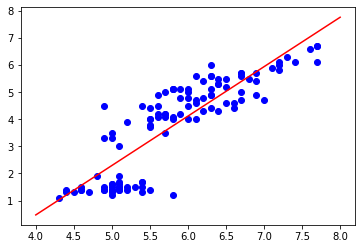

In [23]:
import numpy as np

xx = np.linspace(4, 8, 100)

# y_pred = model.coef_ * xx + model.intercept_
y_pred = model.predict(xx[:, None])

plt.plot(xx, y_pred, 'r')
plt.scatter(X_train, y_train, color='b')
plt.show()

## 꽃잎 길이와 꽂잎 너비를 이용한 선형회귀

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [27]:
X = iris.data[:, 2]
y = iris.data[:, 3]

X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1, 1), y, random_state=3)

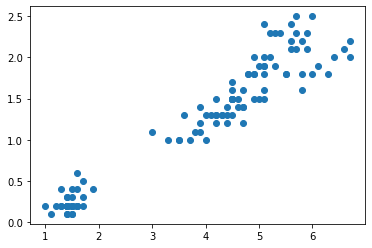

In [30]:
plt.scatter(X_train, y_train)
plt.show()

In [32]:
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9253418194107983, 0.9309332612136965)

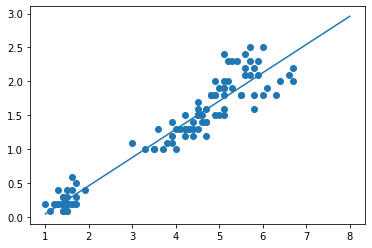

In [34]:
xx = np.linspace(1, 8, 100)
y_pred = model.predict(xx[:, np.newaxis])

plt.plot(xx, y_pred)
plt.scatter(X_train, y_train)

In [35]:
# 테스트 셋을 사용한 평가
model.predict(X_test)

array([0.2163748 , 0.25794608, 0.25794608, 0.29951735, 0.25794608,
       2.50279515, 1.29722805, 0.2163748 , 1.96236852, 1.46351317,
       1.33879933, 0.17480352, 1.29722805, 1.29722805, 1.96236852,
       0.17480352, 1.67136957, 2.17022491, 1.71294084, 0.17480352,
       1.62979829, 1.92079724, 1.75451212, 1.62979829, 0.34108863,
       2.17022491, 1.96236852, 1.33879933, 1.0062291 , 1.58822701,
       0.13323224, 0.42423119, 1.87922596, 1.54665573, 0.2163748 ,
       0.25794608, 1.71294084, 0.17480352])

장단점

- k-NN에 비해 더 제약이 있는 것처럼 보이지만 특성이 많은 데이터셋의 경우에는 우수한 성능을 낼 수 있다.

- 모델의 복잡도를 제어할 방법이 없어 과대적합 되기 쉽다.

모델 정규화(Regularization, 규제)을 통해 과대적합을 제어